<a href="https://colab.research.google.com/github/devsharmapolist/DATA-SCIENCE-COURSE-PW/blob/main/Statistics_Part_2_Practical_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and
interpret the results?


In [ ]:
import numpy as np
import scipy.stats as stats

def z_test(sample, pop_mean, pop_std, alpha=0.05):
    n = len(sample)
    sample_mean = np.mean(sample)
    standard_error = pop_std / np.sqrt(n)

    # Calculate Z-score
    z_score = (sample_mean - pop_mean) / standard_error

    # Calculate p-value (two-tailed test)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

    print(f"Sample Mean: {sample_mean}")
    print(f"Z-Score: {z_score}")
    print(f"P-Value: {p_value}")

    # Interpretation
    if p_value < alpha:
        print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
    else:
        print("Fail to reject the null hypothesis: No significant difference between sample mean and population mean.")

# Example usage
sample_data = [52, 48, 49, 50, 51, 53, 47, 52, 50, 49]
population_mean = 50
population_std = 3  # Known population standard deviation
z_test(sample_data, population_mean, population_std)


Sample Mean: 50.1
Z-Score: 0.10540925533894747
P-Value: 0.9160510722818953
Fail to reject the null hypothesis: No significant difference between sample mean and population mean.


2. Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python@

In [ ]:
import numpy as np
import scipy.stats as stats

def simulate_hypothesis_test(sample_size=30, pop_mean=50, pop_std=10, alpha=0.05):
    # Simulate random sample data
    np.random.seed(42)
    sample = np.random.normal(loc=pop_mean, scale=pop_std, size=sample_size)

    # Compute sample mean and standard error
    sample_mean = np.mean(sample)
    standard_error = pop_std / np.sqrt(sample_size)

    # Calculate Z-score
    z_score = (sample_mean - pop_mean) / standard_error

    # Calculate P-value (two-tailed test)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

    print(f"Sample Mean: {sample_mean}")
    print(f"Z-Score: {z_score}")
    print(f"P-Value: {p_value}")

    # Interpretation
    if p_value < alpha:
        print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
    else:
        print("Fail to reject the null hypothesis: No significant difference between sample mean and population mean.")

# Run the function
simulate_hypothesis_test()


Sample Mean: 48.118531041489625
Z-Score: -1.0305229898218837
P-Value: 0.3027645658813325
Fail to reject the null hypothesis: No significant difference between sample mean and population mean.


3. Implement a one-sample Z-test using Python to compare the sample mean with the population mean@

In [ ]:
import numpy as np
from scipy import stats

# Simulated sample data
np.random.seed(42)  # For reproducibility
sample = np.random.normal(loc=100, scale=15, size=30)  # Sample data with mean=100 and std=15

# Known population parameters
pop_mean = 105     # Known population mean
pop_std = 15       # Known population standard deviation

# Z-test calculation
sample_mean = np.mean(sample)
n = len(sample)

z_score = (sample_mean - pop_mean) / (pop_std / np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test

# Interpretation
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Result: Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("Result: Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.")

Sample Mean: 97.18
Z-score: -2.86
P-value: 0.0043
Result: Reject the null hypothesis. The sample mean is significantly different from the population mean.


4. Perform a two-tailed Z-test using Python and visualize the decision region on a plot@

Sample Mean: 51.4
Z-Score: 1.4757
P-Value: 0.1400
Decision: Fail to Reject H0


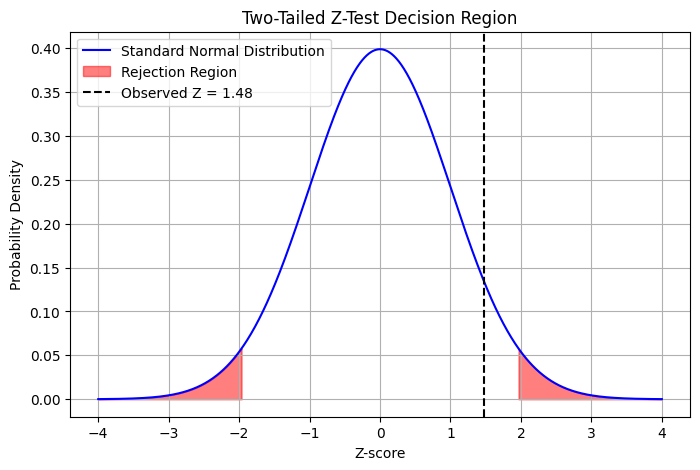

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given data
sample = np.array([52, 55, 49, 51, 50, 53, 54, 52, 48, 50])  # Sample data
pop_mean = 50  # Population mean
pop_std = 3  # Population standard deviation
alpha = 0.05  # Significance level

# Compute sample mean and size
sample_mean = np.mean(sample)
n = len(sample)

# Calculate Z-score
z_score = (sample_mean - pop_mean) / (pop_std / np.sqrt(n))

# Calculate P-value for two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Decision based on significance level
reject_h0 = p_value < alpha

# Print results
print(f"Sample Mean: {sample_mean}")
print(f"Z-Score: {z_score:.4f}")
print(f"P-Value: {p_value:.4f}")
print("Decision:", "Reject H0" if reject_h0 else "Fail to Reject H0")

# Visualization of decision region
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)  # Standard normal distribution

# Critical values for rejection region
z_critical = stats.norm.ppf(1 - alpha / 2)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Standard Normal Distribution", color='blue')

# Shade rejection regions
plt.fill_between(x, y, where=(x <= -z_critical), color='red', alpha=0.5, label="Rejection Region")
plt.fill_between(x, y, where=(x >= z_critical), color='red', alpha=0.5)

# Mark the observed Z-score
plt.axvline(z_score, color='black', linestyle='--', label=f"Observed Z = {z_score:.2f}")

# Labels and legend
plt.title("Two-Tailed Z-Test Decision Region")
plt.xlabel("Z-score")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()


5. Python Function to Calculate and Visualize Type 1 and Type 2 Errors

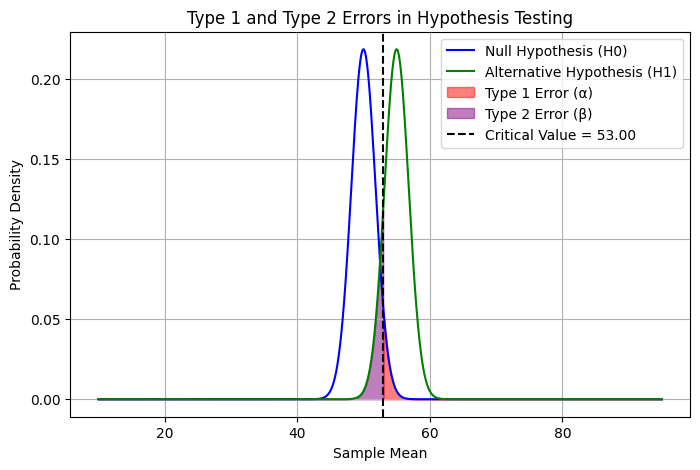

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def visualize_type1_type2_errors(mu_null=50, mu_alt=55, sigma=10, alpha=0.05, n=30):
    """Visualizes Type 1 and Type 2 errors in hypothesis testing."""

    # Standard error
    se = sigma / np.sqrt(n)

    # Critical value for Type 1 error
    z_critical = stats.norm.ppf(1 - alpha)
    critical_value = mu_null + z_critical * se  # Right-tailed test

    # X values for plotting
    x = np.linspace(mu_null - 4*sigma, mu_alt + 4*sigma, 1000)

    # Normal distributions
    y_null = stats.norm.pdf(x, mu_null, se)  # Null hypothesis distribution
    y_alt = stats.norm.pdf(x, mu_alt, se)    # Alternative hypothesis distribution

    plt.figure(figsize=(8, 5))
    plt.plot(x, y_null, label="Null Hypothesis (H0)", color="blue")
    plt.plot(x, y_alt, label="Alternative Hypothesis (H1)", color="green")

    # Shade Type 1 error region
    plt.fill_between(x, y_null, where=(x >= critical_value), color="red", alpha=0.5, label="Type 1 Error (α)")

    # Shade Type 2 error region
    beta = stats.norm.cdf(critical_value, mu_alt, se)  # Probability of failing to reject H1
    plt.fill_between(x, y_alt, where=(x <= critical_value), color="purple", alpha=0.5, label="Type 2 Error (β)")

    # Labels
    plt.axvline(critical_value, color='black', linestyle="--", label=f"Critical Value = {critical_value:.2f}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Probability Density")
    plt.title("Type 1 and Type 2 Errors in Hypothesis Testing")
    plt.legend()
    plt.grid()
    plt.show()

# Run visualization
visualize_type1_type2_errors()


6. Python Program to Perform an Independent T-Test and Interpret the Results

In [ ]:
import numpy as np
import scipy.stats as stats

# Simulated data for two independent groups
group1 = np.array([52, 55, 49, 51, 50, 53, 54, 52, 48, 50])
group2 = np.array([60, 58, 59, 62, 61, 57, 63, 64, 60, 59])

# Perform independent T-test
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=True)

# Significance level
alpha = 0.05

# Display results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < alpha:
    print("Reject the null hypothesis: The two groups have significantly different means.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")


T-Statistic: -8.9751
P-Value: 0.0000
Reject the null hypothesis: The two groups have significantly different means.


7. Python Program to Perform a Paired Sample T-Test and Visualize the Comparison Results

T-Statistic: -7.1538
P-Value: 0.0001
Reject the null hypothesis: The two sets have significantly different means.


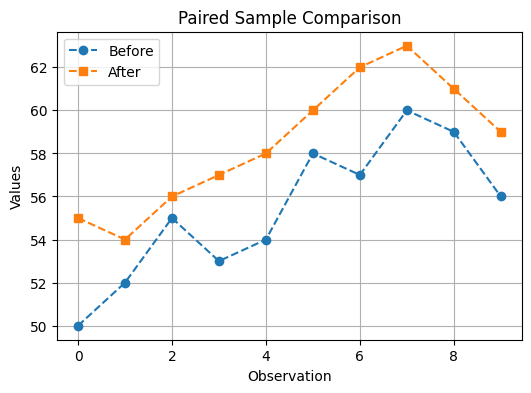

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Simulated data: Before and After measurements
before = np.array([50, 52, 55, 53, 54, 58, 57, 60, 59, 56])
after = np.array([55, 54, 56, 57, 58, 60, 62, 63, 61, 59])

# Perform paired T-test
t_stat, p_value = stats.ttest_rel(before, after)

# Significance level
alpha = 0.05

# Display results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < alpha:
    print("Reject the null hypothesis: The two sets have significantly different means.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the two sets.")

# Visualization
plt.figure(figsize=(6, 4))
plt.plot(before, label="Before", marker="o", linestyle="--")
plt.plot(after, label="After", marker="s", linestyle="--")
plt.xlabel("Observation")
plt.ylabel("Values")
plt.title("Paired Sample Comparison")
plt.legend()
plt.grid()
plt.show()


8. Simulate Data and Perform Both Z-Test and T-Test, Then Compare the Results Using Python

In [ ]:
import numpy as np
import scipy.stats as stats

# Simulate random sample data
np.random.seed(42)  # For reproducibility
sample_size = 30
pop_mean = 100
pop_std = 15

# Generate a sample from a normal distribution
sample = np.random.normal(loc=pop_mean, scale=pop_std, size=sample_size)

# Known population standard deviation (for Z-test)
known_std = pop_std

# Z-test
z_score = (np.mean(sample) - pop_mean) / (known_std / np.sqrt(sample_size))
p_value_z = 2 * (1 - stats.norm.cdf(abs(z_score)))

# T-test
t_stat, p_value_t = stats.ttest_1samp(sample, pop_mean)

# Display results
print(f"Sample Mean: {np.mean(sample):.2f}")
print(f"Z-Test: Z-Score = {z_score:.4f}, P-Value = {p_value_z:.4f}")
print(f"T-Test: T-Statistic = {t_stat:.4f}, P-Value = {p_value_t:.4f}")

# Comparison Interpretation
if p_value_z < 0.05:
    print("Z-Test: Reject the null hypothesis (Significant difference).")
else:
    print("Z-Test: Fail to reject the null hypothesis (No significant difference).")

if p_value_t < 0.05:
    print("T-Test: Reject the null hypothesis (Significant difference).")
else:
    print("T-Test: Fail to reject the null hypothesis (No significant difference).")


Sample Mean: 97.18
Z-Test: Z-Score = -1.0305, P-Value = 0.3028
T-Test: T-Statistic = -1.1450, P-Value = 0.2616
Z-Test: Fail to reject the null hypothesis (No significant difference).
T-Test: Fail to reject the null hypothesis (No significant difference).


9. Write a Python Function to Calculate the Confidence Interval for a Sample Mean and Explain Its Significance

In [ ]:
import numpy as np
import scipy.stats as stats

def confidence_interval(data, confidence=0.95):
    """Calculates the confidence interval for a sample mean."""
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)  # Sample standard deviation (ddof=1 for unbiased estimate)
    n = len(data)

    # Calculate margin of error
    margin_error = stats.t.ppf((1 + confidence) / 2, df=n-1) * (sample_std / np.sqrt(n))

    # Confidence interval
    lower_bound = sample_mean - margin_error
    upper_bound = sample_mean + margin_error

    return sample_mean, (lower_bound, upper_bound)

# Simulated sample data
np.random.seed(42)
sample_data = np.random.normal(loc=100, scale=15, size=30)

# Compute confidence interval
mean, ci = confidence_interval(sample_data)

# Display results
print(f"Sample Mean: {mean:.2f}")
print(f"95% Confidence Interval: {ci}")


Sample Mean: 97.18
95% Confidence Interval: (92.13677771552751, 102.21881540894132)


10. Write a Python Program to Calculate the Margin of Error for a Given Confidence Level Using Sample Data


In [ ]:
import numpy as np
import scipy.stats as stats

def margin_of_error(data, confidence=0.95):
    """Calculates the margin of error for a given confidence level."""
    sample_std = np.std(data, ddof=1)  # Sample standard deviation
    n = len(data)

    # Critical value (T-distribution for small samples, normal for large samples)
    t_critical = stats.t.ppf((1 + confidence) / 2, df=n-1)

    # Compute margin of error
    moe = t_critical * (sample_std / np.sqrt(n))
    return moe

# Simulated sample data
np.random.seed(42)
sample_data = np.random.normal(loc=100, scale=15, size=30)

# Compute margin of error
moe = margin_of_error(sample_data)

# Display results
print(f"Margin of Error (95% Confidence Level): {moe:.2f}")


Margin of Error (95% Confidence Level): 5.04


11. Implement a Bayesian Inference Method Using Bayes' Theorem in Python and Explain the Process

In [ ]:
def bayes_theorem(prior_A, likelihood_B_given_A, likelihood_B_given_not_A):
    """
    Applies Bayes' Theorem to calculate the posterior probability P(A|B).

    Parameters:
    prior_A (float): Prior probability of event A (P(A)).
    likelihood_B_given_A (float): Likelihood of B given A (P(B|A)).
    likelihood_B_given_not_A (float): Likelihood of B given not A (P(B|¬A)).

    Returns:
    float: Posterior probability P(A|B).
    """
    prior_not_A = 1 - prior_A  # P(¬A)

    # Total probability of B
    total_B = (likelihood_B_given_A * prior_A) + (likelihood_B_given_not_A * prior_not_A)

    # Bayes' theorem formula
    posterior_A_given_B = (likelihood_B_given_A * prior_A) / total_B

    return posterior_A_given_B

# Example: Medical Test for a Disease
prior_disease = 0.01  # P(Disease) = 1%
sensitivity = 0.95     # P(Test Positive | Disease) = 95%
false_positive_rate = 0.05  # P(Test Positive | No Disease) = 5%

# Compute posterior probability
posterior = bayes_theorem(prior_disease, sensitivity, false_positive_rate)

# Display results
print(f"Posterior Probability of Having the Disease Given a Positive Test: {posterior:.4f}")


Posterior Probability of Having the Disease Given a Positive Test: 0.1610


12. Perform a Chi-Square Test for Independence Between Two Categorical Variables in Python

In [ ]:
import numpy as np
import scipy.stats as stats

# Sample contingency table: Survey on Exercise vs. Diet Preference
# Rows: Exercise Frequency (Regular, Occasional, Rarely)
# Columns: Diet Preference (Vegetarian, Non-Vegetarian)

observed = np.array([[30, 20],  # Regular Exercise
                     [25, 35],  # Occasional Exercise
                     [20, 40]]) # Rarely Exercise

# Perform Chi-Square Test for Independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)

# Display results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: No significant association between the variables.")

# Expected frequencies
print("Expected Frequencies Table:")
print(expected)


Chi-Square Statistic: 8.0924
Degrees of Freedom: 2
P-Value: 0.0175
Reject the null hypothesis: There is a significant association between the variables.
Expected Frequencies Table:
[[22.05882353 27.94117647]
 [26.47058824 33.52941176]
 [26.47058824 33.52941176]]


13. Write a Python Program to Calculate the Expected Frequencies for a Chi-Square Test Based on Observed Data

In [ ]:
import numpy as np
import scipy.stats as stats

def calculate_expected_frequencies(observed):
    """
    Computes expected frequencies for a Chi-Square test.

    Parameters:
    observed (numpy array): Contingency table with observed frequencies.

    Returns:
    numpy array: Expected frequencies.
    """
    _, _, _, expected = stats.chi2_contingency(observed)
    return expected

# Sample observed frequencies (Exercise vs. Diet Preference)
observed = np.array([[30, 20],  # Regular Exercise
                     [25, 35],  # Occasional Exercise
                     [20, 40]]) # Rarely Exercise

# Compute expected frequencies
expected_frequencies = calculate_expected_frequencies(observed)

# Display results
print("Observed Frequencies:")
print(observed)
print("\nExpected Frequencies:")
print(expected_frequencies)


Observed Frequencies:
[[30 20]
 [25 35]
 [20 40]]

Expected Frequencies:
[[22.05882353 27.94117647]
 [26.47058824 33.52941176]
 [26.47058824 33.52941176]]


14. Perform a Goodness-of-Fit Test Using Python to Compare the Observed Data to an Expected Distribution

In [ ]:
import numpy as np
import scipy.stats as stats

def goodness_of_fit_test(observed, expected):
    """
    Performs a Chi-Square Goodness-of-Fit test.

    Parameters:
    observed (list or array): Observed frequencies.
    expected (list or array): Expected frequencies.

    Returns:
    chi2_stat (float): Chi-square statistic.
    p_value (float): P-value for the test.
    """
    chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
    return chi2_stat, p_value

# Example: Observed vs Expected Number of Customers Visiting a Store per Day
observed = np.array([50, 60, 40, 55, 45])
expected = np.array([50, 50, 50, 50, 50])  # Assuming uniform distribution

# Perform Goodness-of-Fit Test
chi2_stat, p_value = goodness_of_fit_test(observed, expected)

# Display results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The observed distribution significantly differs from the expected distribution.")
else:
    print("Fail to reject the null hypothesis: No significant difference between observed and expected distributions.")


Chi-Square Statistic: 5.0000
P-Value: 0.2873
Fail to reject the null hypothesis: No significant difference between observed and expected distributions.


15. Create a Python Script to Simulate and Visualize the Chi-Square Distribution and Discuss Its Characteristics

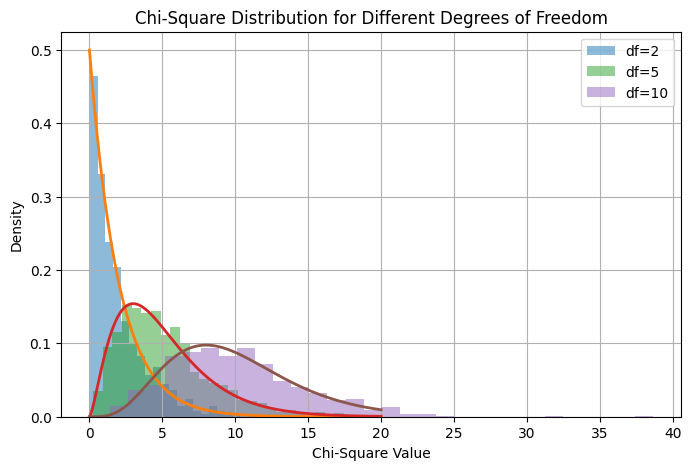

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def plot_chi_square_distribution(df_values, size=1000):
    """
    Simulates and plots the Chi-Square distribution for different degrees of freedom.

    Parameters:
    df_values (list): List of degrees of freedom to visualize.
    size (int): Number of samples for simulation.
    """
    x = np.linspace(0, 20, 1000)

    plt.figure(figsize=(8, 5))

    for df in df_values:
        chi_sq_values = np.random.chisquare(df, size)
        plt.hist(chi_sq_values, bins=30, density=True, alpha=0.5, label=f'df={df}')
        plt.plot(x, stats.chi2.pdf(x, df), lw=2)

    plt.title("Chi-Square Distribution for Different Degrees of Freedom")
    plt.xlabel("Chi-Square Value")
    plt.ylabel("Density")
    plt.legend()
    plt.grid()
    plt.show()

# Simulate and plot Chi-Square distributions for df = 2, 5, 10
plot_chi_square_distribution(df_values=[2, 5, 10])


16. Implement an F-Test Using Python to Compare the Variances of Two Random Samples

In [ ]:
import numpy as np
import scipy.stats as stats

def f_test(sample1, sample2):
    """
    Performs an F-test to compare the variances of two samples.

    Parameters:
    sample1 (array-like): First sample data.
    sample2 (array-like): Second sample data.

    Returns:
    f_stat (float): F-test statistic.
    p_value (float): P-value for the test.
    """
    var1 = np.var(sample1, ddof=1)  # Sample variance (unbiased)
    var2 = np.var(sample2, ddof=1)

    f_stat = var1 / var2 if var1 > var2 else var2 / var1  # F-statistic (larger variance / smaller variance)
    dfn, dfd = len(sample1) - 1, len(sample2) - 1  # Degrees of freedom
    p_value = 2 * min(stats.f.cdf(f_stat, dfn, dfd), 1 - stats.f.cdf(f_stat, dfn, dfd))  # Two-tailed p-value

    return f_stat, p_value

# Generating two random samples
np.random.seed(42)
sample1 = np.random.normal(loc=50, scale=10, size=30)  # Mean=50, Std Dev=10
sample2 = np.random.normal(loc=50, scale=15, size=30)  # Mean=50, Std Dev=15

# Perform F-test
f_stat, p_value = f_test(sample1, sample2)

# Display results
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The variances of the two samples are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in variances.")


F-Statistic: 2.4082
P-Value: 0.0209
Reject the null hypothesis: The variances of the two samples are significantly different.


17. Write a Python Program to Perform an ANOVA Test to Compare Means Between Multiple Groups and Interpret the Results

In [ ]:
import numpy as np
import scipy.stats as stats

def perform_anova(*groups):
    """
    Performs a one-way ANOVA test to compare means between multiple groups.

    Parameters:
    groups (list of arrays): Data for each group.

    Returns:
    f_stat (float): F-test statistic.
    p_value (float): P-value for the test.
    """
    f_stat, p_value = stats.f_oneway(*groups)
    return f_stat, p_value

# Generating three random sample groups
np.random.seed(42)
group1 = np.random.normal(loc=50, scale=5, size=30)  # Mean=50, Std Dev=5
group2 = np.random.normal(loc=55, scale=5, size=30)  # Mean=55, Std Dev=5
group3 = np.random.normal(loc=60, scale=5, size=30)  # Mean=60, Std Dev=5

# Perform ANOVA
f_stat, p_value = perform_anova(group1, group2, group3)

# Display results
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the group means.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the group means.")


F-Statistic: 40.9756
P-Value: 0.0000
Reject the null hypothesis: There is a significant difference between the group means.


18. Perform a One-Way ANOVA Test Using Python to Compare the Means of Different Groups and Plot the Results

<ipython-input-3-6d95a328f6db>:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[f"Group {i+1}" for i in range(len(groups))])


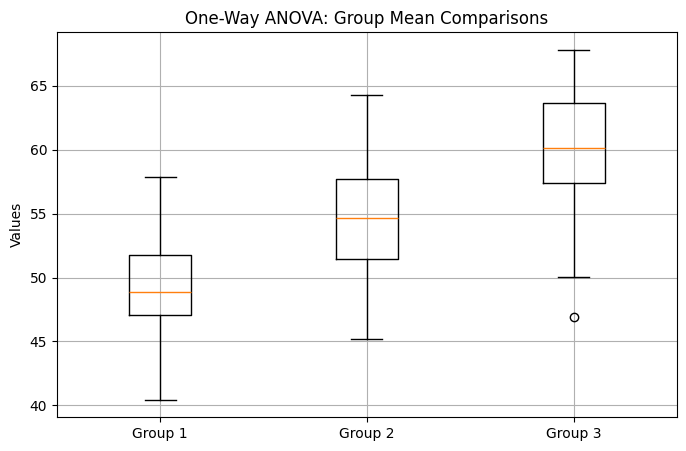

F-Statistic: 40.9756
P-Value: 0.0000
Reject the null hypothesis: At least one group has a significantly different mean.


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def perform_one_way_anova(*groups):
    """
    Performs a one-way ANOVA test and visualizes the results with a boxplot.

    Parameters:
    groups (list of arrays): Data for each group.

    Returns:
    f_stat (float): F-test statistic.
    p_value (float): P-value for the test.
    """
    f_stat, p_value = stats.f_oneway(*groups)

    # Boxplot for visualization
    plt.figure(figsize=(8, 5))
    plt.boxplot(groups, labels=[f"Group {i+1}" for i in range(len(groups))])
    plt.title("One-Way ANOVA: Group Mean Comparisons")
    plt.ylabel("Values")
    plt.grid()
    plt.show()

    return f_stat, p_value

# Generating three sample groups
np.random.seed(42)
group1 = np.random.normal(loc=50, scale=5, size=30)  # Mean=50, Std Dev=5
group2 = np.random.normal(loc=55, scale=5, size=30)  # Mean=55, Std Dev=5
group3 = np.random.normal(loc=60, scale=5, size=30)  # Mean=60, Std Dev=5

# Perform One-Way ANOVA
f_stat, p_value = perform_one_way_anova(group1, group2, group3)

# Display results
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one group has a significantly different mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference between group means.")


19. Write a Python Function to Check the Assumptions (Normality, Independence, and Equal Variance) for ANOVA

In [ ]:
import numpy as np
import scipy.stats as stats

def check_anova_assumptions(*groups):
    """
    Checks the assumptions for ANOVA: Normality and Equal Variance.

    Parameters:
    groups (list of arrays): Data for each group.

    Returns:
    dict: Test results for normality and homogeneity of variance.
    """
    results = {}

    # 1. Normality Check (Shapiro-Wilk Test)
    normality_pvalues = [stats.shapiro(group)[1] for group in groups]
    results['Normality'] = normality_pvalues

    # 2. Equal Variance Check (Levene’s Test)
    levene_stat, levene_p = stats.levene(*groups)
    results['Equal Variance (Levene)'] = (levene_stat, levene_p)

    return results

# Generating three sample groups
np.random.seed(42)
group1 = np.random.normal(loc=50, scale=5, size=30)  # Mean=50, Std Dev=5
group2 = np.random.normal(loc=55, scale=5, size=30)  # Mean=55, Std Dev=5
group3 = np.random.normal(loc=60, scale=5, size=30)  # Mean=60, Std Dev=5

# Check ANOVA assumptions
assumption_results = check_anova_assumptions(group1, group2, group3)

# Display results
print("ANOVA Assumption Checks:")

# Normality check results
for i, p_value in enumerate(assumption_results['Normality']):
    print(f"Group {i+1} Normality Test p-value: {p_value:.4f} {'(Pass)' if p_value > 0.05 else '(Fail)'}")

# Equal variance check results
levene_stat, levene_p = assumption_results['Equal Variance (Levene)']
print(f"\nLevene’s Test for Equal Variance p-value: {levene_p:.4f} {'(Pass)' if levene_p > 0.05 else '(Fail)'}")

# Interpretation
if all(p > 0.05 for p in assumption_results['Normality']) and levene_p > 0.05:
    print("\nAll ANOVA assumptions are satisfied. You can proceed with ANOVA.")
else:
    print("\nOne or more assumptions are violated. Consider using a non-parametric test like Kruskal-Wallis.")


ANOVA Assumption Checks:
Group 1 Normality Test p-value: 0.6868 (Pass)
Group 2 Normality Test p-value: 0.9130 (Pass)
Group 3 Normality Test p-value: 0.3654 (Pass)

Levene’s Test for Equal Variance p-value: 0.8627 (Pass)

All ANOVA assumptions are satisfied. You can proceed with ANOVA.


20. Perform a Two-Way ANOVA Test Using Python to Study the Interaction Between Two Factors and Visualize the Results


Two-Way ANOVA Results:
                              sum_sq    df         F    PR(>F)
C(Method)                  6.730370   1.0  0.077512  0.781723
C(StudyTime)               0.661767   1.0  0.007621  0.930744
C(Method):C(StudyTime)     0.079477   1.0  0.000915  0.975972
Residual                4862.451085  56.0       NaN       NaN


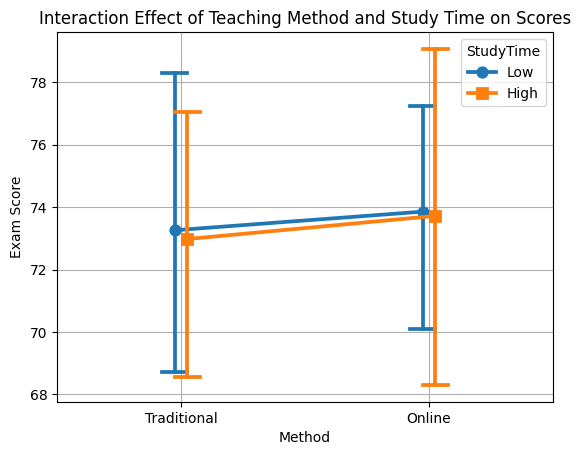

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
data = pd.DataFrame({
    "Score": np.random.normal(loc=75, scale=10, size=60),  # Exam scores
    "Method": np.repeat(["Traditional", "Online"], 30),    # Teaching method (Factor 1)
    "StudyTime": np.tile(["Low", "High"], 30)             # Study time (Factor 2)
})

# Perform Two-Way ANOVA
model = ols("Score ~ C(Method) + C(StudyTime) + C(Method):C(StudyTime)", data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA table
print("\nTwo-Way ANOVA Results:\n", anova_table)

# Interaction Plot
sns.pointplot(x="Method", y="Score", hue="StudyTime", data=data, dodge=True, markers=["o", "s"], capsize=0.1)
plt.title("Interaction Effect of Teaching Method and Study Time on Scores")
plt.ylabel("Exam Score")
plt.grid()
plt.show()


21. Write a Python Program to Visualize the F-Distribution and Discuss Its Use in Hypothesis Testing

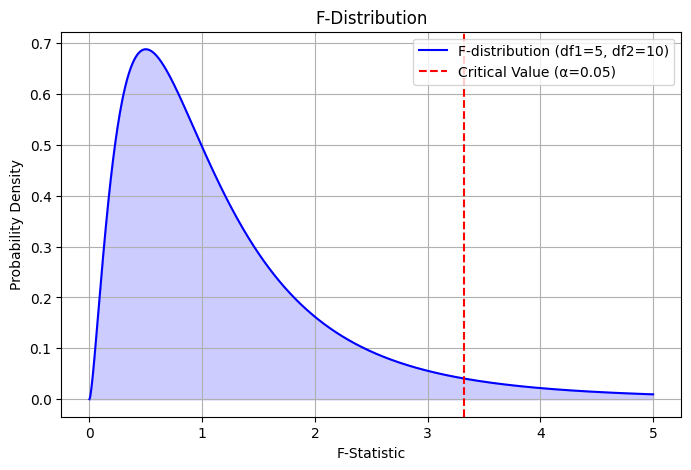

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def plot_f_distribution(df1, df2):
    """
    Plots the F-distribution for given degrees of freedom.

    Parameters:
    df1 (int): Degrees of freedom for numerator.
    df2 (int): Degrees of freedom for denominator.
    """
    x = np.linspace(0, 5, 1000)  # Generate x values
    y = stats.f.pdf(x, df1, df2)  # Compute F-distribution PDF

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label=f"F-distribution (df1={df1}, df2={df2})", color='b')
    plt.fill_between(x, y, alpha=0.2, color='b')
    plt.axvline(stats.f.ppf(0.95, df1, df2), color='r', linestyle='--', label="Critical Value (α=0.05)")

    plt.title("F-Distribution")
    plt.xlabel("F-Statistic")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid()
    plt.show()

# Example: F-distribution with 5 and 10 degrees of freedom
plot_f_distribution(df1=5, df2=10)


22. Perform a One-Way ANOVA Test in Python and Visualize the Results with Boxplots

F-Statistic: 4.1585, P-Value: 0.0188
Conclusion: There is a significant difference between group means.


<ipython-input-7-1ff41e803eee>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Method", y="Score", data=df, palette="Set2")


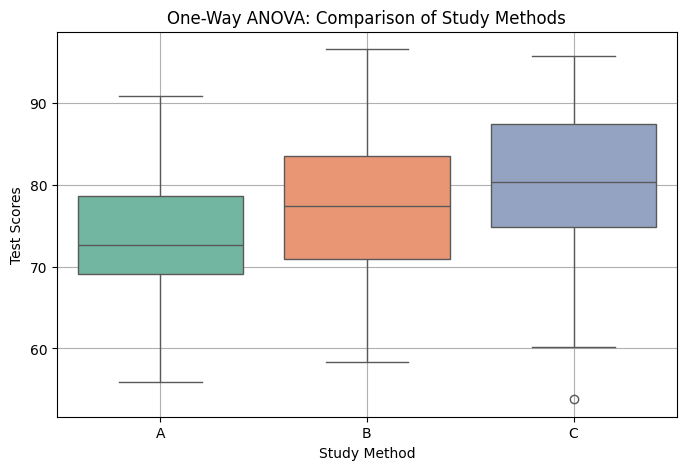

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Generate sample data for three groups
np.random.seed(42)
group_A = np.random.normal(loc=75, scale=10, size=30)  # Study Method A
group_B = np.random.normal(loc=78, scale=10, size=30)  # Study Method B
group_C = np.random.normal(loc=80, scale=10, size=30)  # Study Method C

# Create a DataFrame
df = pd.DataFrame({
    "Score": np.concatenate([group_A, group_B, group_C]),
    "Method": ["A"] * 30 + ["B"] * 30 + ["C"] * 30
})

# Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(group_A, group_B, group_C)

# Print ANOVA results
print(f"F-Statistic: {f_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: There is a significant difference between group means.")
else:
    print("Conclusion: No significant difference between group means.")

# Boxplot Visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x="Method", y="Score", data=df, palette="Set2")
plt.title("One-Way ANOVA: Comparison of Study Methods")
plt.xlabel("Study Method")
plt.ylabel("Test Scores")
plt.grid()
plt.show()


23. Simulate Random Data from a Normal Distribution and Perform Hypothesis Testing

T-Statistic: -1.7076, P-Value: 0.0940
Conclusion: No significant difference between sample mean and population mean.


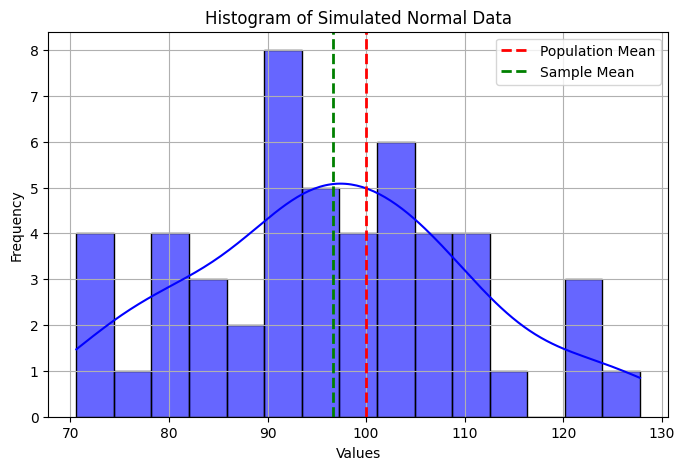

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate random data from a normal distribution
np.random.seed(42)
sample_size = 50
population_mean = 100
sample_data = np.random.normal(loc=population_mean, scale=15, size=sample_size)  # Normal distribution (mean=100, std=15)

# Hypothesis Testing: One-sample t-test
test_stat, p_value = stats.ttest_1samp(sample_data, popmean=population_mean)

# Print test results
print(f"T-Statistic: {test_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: The sample mean is significantly different from the population mean.")
else:
    print("Conclusion: No significant difference between sample mean and population mean.")

# Visualization of the normal distribution
plt.figure(figsize=(8, 5))
sns.histplot(sample_data, bins=15, kde=True, color="blue", alpha=0.6)
plt.axvline(population_mean, color='r', linestyle='dashed', linewidth=2, label="Population Mean")
plt.axvline(np.mean(sample_data), color='g', linestyle='dashed', linewidth=2, label="Sample Mean")
plt.title("Histogram of Simulated Normal Data")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()


24. Perform a Hypothesis Test for Population Variance Using a Chi-Square Distribution

In [9]:
import numpy as np
import scipy.stats as stats

# Sample data
np.random.seed(42)
sample_data = np.random.normal(loc=50, scale=8, size=30)  # Sample from normal distribution (mean=50, std=8)
sample_size = len(sample_data)
sample_variance = np.var(sample_data, ddof=1)  # Sample variance (unbiased estimator)

# Assumed population variance
population_variance = 64  # (e.g., σ² = 8²)

# Chi-square statistic
chi_square_stat = (sample_size - 1) * sample_variance / population_variance

# Degrees of freedom
df = sample_size - 1

# P-value (two-tailed test)
p_value = 2 * min(stats.chi2.cdf(chi_square_stat, df), 1 - stats.chi2.cdf(chi_square_stat, df))

# Print results
print(f"Sample Variance: {sample_variance:.4f}")
print(f"Chi-Square Statistic: {chi_square_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: The sample variance is significantly different from the population variance.")
else:
    print("Conclusion: No significant difference between sample variance and population variance.")


Sample Variance: 51.8407
Chi-Square Statistic: 23.4903
P-Value: 0.4927
Conclusion: No significant difference between sample variance and population variance.


25. Perform a Z-Test for Comparing Proportions Between Two Groups

In [10]:
import numpy as np
import scipy.stats as stats

# Data: successes and total samples for two groups
success_A, total_A = 120, 300  # Group A: 120 successes out of 300
success_B, total_B = 150, 350  # Group B: 150 successes out of 350

# Calculate sample proportions
p_A = success_A / total_A
p_B = success_B / total_B

# Pooled proportion
p_pooled = (success_A + success_B) / (total_A + total_B)

# Standard error calculation
se = np.sqrt(p_pooled * (1 - p_pooled) * (1/total_A + 1/total_B))

# Z-score calculation
z_stat = (p_A - p_B) / se

# P-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Print results
print(f"Proportion A: {p_A:.4f}, Proportion B: {p_B:.4f}")
print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: There is a significant difference between the two proportions.")
else:
    print("Conclusion: No significant difference between the two proportions.")


Proportion A: 0.4000, Proportion B: 0.4286
Z-Statistic: -0.7369
P-Value: 0.4612
Conclusion: No significant difference between the two proportions.


26. Implement an F-Test for Comparing the Variances of Two Datasets

In [11]:
import numpy as np
import scipy.stats as stats

# Generate random test scores for two groups
np.random.seed(42)
data_A = np.random.normal(loc=75, scale=10, size=20)  # Mean=75, Std Dev=10
data_B = np.random.normal(loc=80, scale=15, size=20)  # Mean=80, Std Dev=15

# Calculate sample variances
var_A = np.var(data_A, ddof=1)
var_B = np.var(data_B, ddof=1)

# Compute F-statistic
F_stat = var_A / var_B

# Degrees of freedom
df_A = len(data_A) - 1
df_B = len(data_B) - 1

# Compute p-value (two-tailed test)
p_value = 2 * min(stats.f.cdf(F_stat, df_A, df_B), 1 - stats.f.cdf(F_stat, df_A, df_B))

# Print results
print(f"Variance of A: {var_A:.4f}, Variance of B: {var_B:.4f}")
print(f"F-Statistic: {F_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: The variances of the two datasets are significantly different.")
else:
    print("Conclusion: No significant difference in variances between the two datasets.")


Variance of A: 92.1655, Variance of B: 210.8473
F-Statistic: 0.4371
P-Value: 0.0791
Conclusion: No significant difference in variances between the two datasets.


27. Perform a Chi-Square Test for Goodness of Fit with Simulated Data

In [12]:
import numpy as np
import scipy.stats as stats

# Observed frequencies (from rolling a die 300 times)
observed = np.array([52, 48, 51, 50, 49, 50])  # Rolls for faces 1 to 6

# Expected frequencies (for a fair die, each face should appear equally)
expected = np.full(6, 300 / 6)  # 300 rolls, 6 sides, equal probability

# Perform Chi-Square Goodness of Fit Test
chi_square_stat, p_value = stats.chisquare(observed, expected)

# Print results
print(f"Chi-Square Statistic: {chi_square_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: The die is biased (reject null hypothesis).")
else:
    print("Conclusion: No significant difference; the die appears fair.")


Chi-Square Statistic: 0.2000
P-Value: 0.9991
Conclusion: No significant difference; the die appears fair.
